#**의사결정나무 예제**

- 과일 종류 맞추기

In [1]:
# Step 1. 구글 코랩에 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

In [1]:
# Step 2. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당
from google.colab import files

myfile = files.upload()

import io
import pandas as pd

# pd.read_csv로 csv 파일 불러오기
src_data = pd.read_csv(io.BytesIO(myfile['의사결정나무_과일종류_2가지.csv']), encoding='cp949')
src_data

Saving 의사결정나무_과일종류_2가지.csv to 의사결정나무_과일종류_2가지.csv


,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,1900,19.0
5,수박,600,9.0
6,참외,500,8.0
7,참외,400,7.5
8,참외,450,5.0
9,참외,400,4.5


In [5]:
# Step 3. 주어진 데이터를 훈련용 데이터와 검증용 데이터로 분류

# 무게, 길이에 따른 종류 판별

data = src_data[['무게', '길이']].to_numpy()
target = src_data['종류'].to_numpy()

print(data)
print(target)

# train, test 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=40)

[[2000.    30. ]
 [2500.    25. ]
 [1800.    20. ]
 [1500.    16. ]
 [1900.    19. ]
 [ 600.     9. ]
 [ 500.     8. ]
 [ 400.     7.5]
 [ 450.     5. ]
 [ 400.     4.5]
 [ 600.     9.5]
 [ 550.     8.5]]
['수박' '수박' '수박' '수박' '수박' '수박' '참외' '참외' '참외' '참외' '참외' '참외']


In [6]:
print(X_train.shape, X_test.shape)
print(y_train)

(9, 2) (3, 2)
['수박' '수박' '수박' '수박' '수박' '참외' '수박' '참외' '참외']


In [18]:
# Step 4. 훈련용 데이터로 모델 생성 후 테스트용 데이터로 모델 검증
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 분류기 생성
dt = DecisionTreeClassifier()

# 학습
dt.fit(X_train, y_train)

# score 출력
print('score: ', dt.score(X_test, y_test))

# 예측: 수박이 나오면 성공
print('result: ', dt.predict([[1500, 15]]))

score:  0.6666666666666666
result:  ['수박']


In [22]:
# split하지 않은 데이터로 모델 훈련 다시 진행 (판단 과정을 그림으로 확인하기 위함)

dt.fit(data, target)

DecisionTreeClassifier()

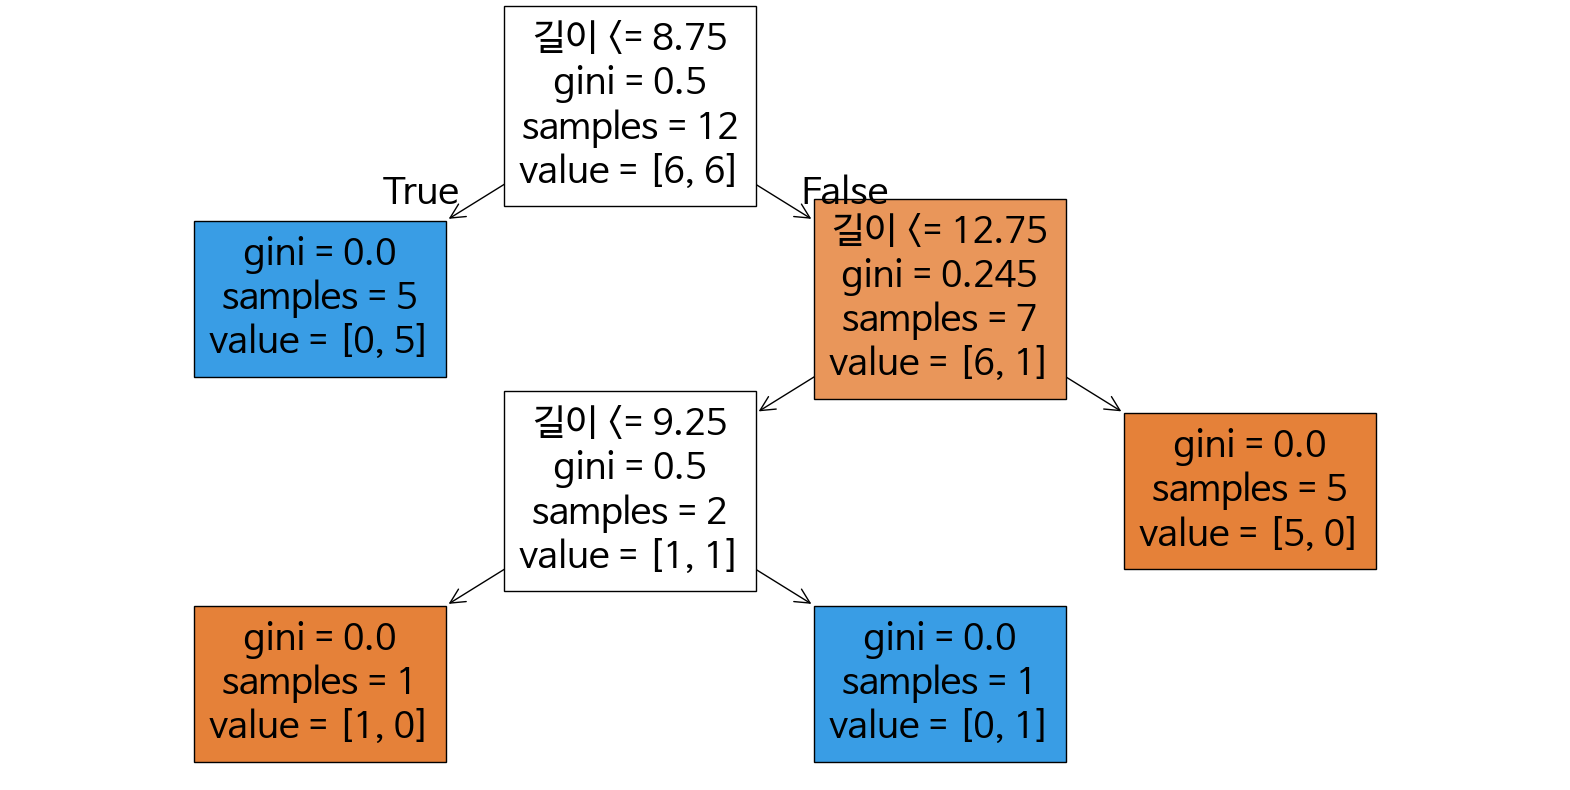

In [23]:
# Step 5. 판단 과정을 그림으로 확인
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

from sklearn.tree import plot_tree

plt.figure(figsize = (20, 10))
plot_tree(dt, max_depth = 5, filled=True, feature_names=['무게', '길이'])
plt.show()

# **앙상블 랜덤포레스트 예제**

- 과일 종류 맞추기

In [ ]:
# Step 1. 구글 코랩에 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [109]:
# Step 2. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당
from google.colab import files

myfile = files.upload()

import io
import pandas as pd

# pd.read_csv로 csv 파일 불러오기
src_data = pd.read_csv(io.BytesIO(myfile['과일채소목록.csv']), encoding='cp949')
src_data

KeyboardInterrupt: 

In [119]:
# Step 3. 훈련용 세트와 테스트용 세트로 분류

# '무게_g', '길이_cm', '색상', '당도'에 따른 과일 종류 분류

data2 = src_data[['무게_g', '길이_cm', '색상', '당도']]
target2 = src_data['종류']

from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, test_size=0.2, random_state=40)

In [120]:
print(X_train2.shape, X_test2.shape)
print(X_train2)
print(y_train2)

(40, 4) (10, 4)
    무게_g  길이_cm  색상   당도
16   500   25.0   1  2.0
35   501    8.1   2  8.1
25  2001   30.5   1  8.1
21   250   25.0   3  7.5
44   351   20.1   1  1.4
41   501   25.1   1  2.1
23   270   26.0   3  8.5
36   401    7.6   2  7.3
5    100    3.5   3  6.0
13   400    6.5   2  6.5
39   601    8.6   2  8.1
17   380   22.0   1  1.5
43   401   23.1   1  1.1
24   290   29.0   3  9.0
3   1500   16.0   1  8.5
22   220   22.0   3  7.0
40   451   20.1   1  3.1
26  2501   25.1   1  7.1
34   111    3.7   3  7.6
20   280   28.0   3  8.0
28  1501   16.1   1  8.6
14   600    8.5   2  8.0
15   450   20.0   1  3.0
30   101    3.6   3  6.1
8    150    3.8   3  8.5
46   251   25.1   3  7.6
32    91    2.9   3  8.1
9    110    3.6   3  7.5
48   271   26.1   3  8.6
42   381   22.1   1  1.6
10   500    8.0   2  8.0
31   121    3.8   3  7.1
19   350   20.0   1  1.3
47   221   22.1   3  7.1
12   450    8.0   2  7.5
1   2500   25.0   1  7.0
37   451    8.1   2  7.6
7     90    2.8   3  8.0
27  1801 

In [121]:
# 랜덤 포레스트 모델 생성
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=40)

# 학습
rf.fit(X_train2, y_train2)

# 예측
predict_data = rf.predict(X_test2)
print('result: ', predict_data)

# score
print('score: ', rf.score(X_test2, y_test2))

result:  ['자두' '수박' '거봉포도' '참외' '거봉포도' '수박' '옥수수' '수박' '참외' '수박']
score:  1.0


## 결과표 작성 및 시각화

In [122]:
# 테스트 데이터 확인
print(X_test2)

    무게_g  길이_cm  색상   당도
33   151    3.9   3  8.6
29  2201   21.1   1  9.6
49   291   29.1   3  9.1
38   401    6.6   2  6.6
45   281   28.1   3  8.1
0   2000   30.0   1  8.0
18   400   23.0   1  1.0
4   2200   21.0   1  9.5
11   400    7.5   2  7.2
2   1800   20.0   1  6.5


In [123]:
# 예측결과 데이터프레임을 생성
result = pd.DataFrame(rf.predict(X_test2), columns=['예측결과'])

# concat을 통해 기존 테스트 data와 예측결과 데이터를 합침
concat_result = pd.concat([X_test2.reset_index(drop=True), result], axis=1)

concat_result

,무게_g,길이_cm,색상,당도,예측결과
0,151,3.9,3,8.6,자두
1,2201,21.1,1,9.6,수박
2,291,29.1,3,9.1,거봉포도
3,401,6.6,2,6.6,참외
4,281,28.1,3,8.1,거봉포도
5,2000,30.0,1,8.0,수박
6,400,23.0,1,1.0,옥수수
7,2200,21.0,1,9.5,수박
8,400,7.5,2,7.2,참외
9,1800,20.0,1,6.5,수박


In [124]:
# k-foid 교차 검증

import numpy as np
from sklearn.model_selection import cross_validate

# return_train_score=True → 학습 시 score 점수를 누적해서 반환
# n_jobs: 동시에 실행되는 갯수 → -1 자동 지정

scores = cross_validate(rf, X_train2, y_train2, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 1.0


중요속성지표값:  [0.43788379 0.18804429 0.15510803 0.21896389]


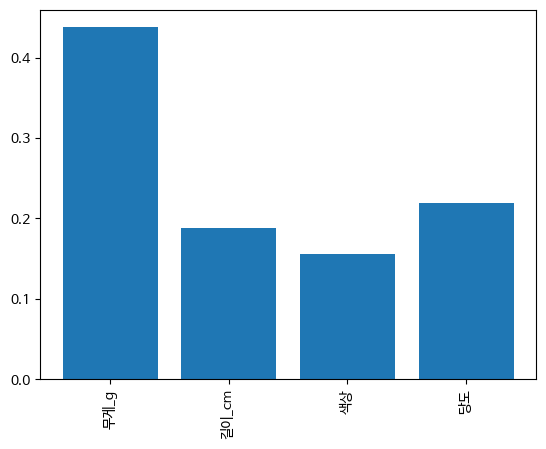

In [125]:
# 중요 속성 지표값 출력

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

imp = rf.feature_importances_
print('중요속성지표값: ', imp)

plt.figure()
plt.bar(range(len(imp)), imp)
plt.xticks(range(len(imp)), data2.columns, rotation=90)
plt.show()

# **K-Fold와 그리드서치 실습**

- 와인 분류

In [135]:
from google.colab import files

myfile = files.upload()

import io
import pandas as pd

src_data = pd.read_csv(io.BytesIO(myfile['와인.csv']), encoding='cp949')
src_data

Saving 와인.csv to 와인.csv


,알콜도수,당도,산도_ph,종류
0,9.4,1.9,3.51,레드와인
1,9.8,2.6,3.20,레드와인
2,9.8,2.3,3.26,레드와인
3,9.8,1.9,3.16,레드와인
4,9.4,1.9,3.51,레드와인
...,...,...,...,...
6492,11.2,1.6,3.27,화이트와인
6493,9.6,8.0,3.15,화이트와인
6494,9.4,1.2,2.99,화이트와인
6495,12.8,1.1,3.34,화이트와인


In [7]:
src_data = pd.read_csv('./와인.csv', encoding='cp949')
src_data

,알콜도수,당도,산도_ph,종류
0,9.4,1.9,3.51,레드와인
1,9.8,2.6,3.20,레드와인
2,9.8,2.3,3.26,레드와인
3,9.8,1.9,3.16,레드와인
4,9.4,1.9,3.51,레드와인
...,...,...,...,...
6492,11.2,1.6,3.27,화이트와인
6493,9.6,8.0,3.15,화이트와인
6494,9.4,1.2,2.99,화이트와인
6495,12.8,1.1,3.34,화이트와인


In [8]:
# Step 2. 주어진 데이터를 훈련용 데이터와 검증용 데이터로 분류
import numpy as np

# '알콜도수', '당도', '산도_ph' 가지고 와인 종류 분류
data = src_data[['알콜도수', '당도', '산도_ph']]
target = src_data['종류']

print(data)
print(target)

# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=10)

      알콜도수   당도  산도_ph
0      9.4  1.9   3.51
1      9.8  2.6   3.20
2      9.8  2.3   3.26
3      9.8  1.9   3.16
4      9.4  1.9   3.51
...    ...  ...    ...
6492  11.2  1.6   3.27
6493   9.6  8.0   3.15
6494   9.4  1.2   2.99
6495  12.8  1.1   3.34
6496  11.8  0.8   3.26

[6497 rows x 3 columns]
0        레드와인
1        레드와인
2        레드와인
3        레드와인
4        레드와인
        ...  
6492    화이트와인
6493    화이트와인
6494    화이트와인
6495    화이트와인
6496    화이트와인
Name: 종류, Length: 6497, dtype: object


In [9]:
# 교차 검증 없이 모델 검증
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
dt = DecisionTreeClassifier(random_state=10)

# 모델 학습
dt.fit(X_train, y_train)

# 모델 score 출력
print('▶ Train Data Score: ', dt.score(X_train, y_train))
print('▶ Test Data Score: ', dt.score(X_test, y_test))

▶ Train Data Score:  0.9974985568597268
▶ Test Data Score:  0.8515384615384616


In [10]:
# Step 3. K-Fold 교차 검증 수행 (K값 자율 설정)
# cross_validate, cross_val_score 출력
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=10)

scores1 = cross_validate(dt, X_train, y_train, cv=5)
scores2 = cross_val_score(dt, X_train, y_train, cv=5)

print('▶ cross_validate 결과: ', np.mean(scores1['test_score']))
print('▶ cross_val_score 결과: ', np.mean(scores2))

▶ cross_validate 결과:  0.8578044717553862
▶ cross_val_score 결과:  0.8578044717553862


In [11]:
# 그리드서치를 사용하여 하이퍼 파라미터 튜닝하기
from sklearn.model_selection import GridSearchCV

parm = {
    'max_depth': range(1, 10, 1),
    'min_samples_split': range(2, 20, 1)
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=50), parm, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 8, 'min_samples_split': 17}


In [168]:
print(gs.best_params_)

dt = gs.best_estimator_

print('▶ Train Data Score: ', dt.score(X_train, y_train))
print('▶ Test Data Score: ', dt.score(X_test, y_test))

{'max_depth': 8, 'min_samples_split': 17}
▶ Train Data Score:  0.8989801808735809
▶ Test Data Score:  0.8592307692307692


In [169]:
# 훈련용, 테스트용 데이터에 대해 최적의 결과값 출력
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=17, random_state=50)

dt.fit(X_train, y_train)

print('▶ Train Data Score: ', dt.score(X_train, y_train))
print('▶ Test Data Score: ', dt.score(X_test, y_test))

▶ Train Data Score:  0.8989801808735809
▶ Test Data Score:  0.8592307692307692


# **실습 문제**

## **의사결정나무 실습 - 붓꽃 분류**

In [ ]:
# Step 1. 구글 코랩에 한글 폰트 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [127]:
# Step 2. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당

from google.colab import files

myfile = files.upload()

import io
import pandas as pd

flower = pd.read_csv(io.BytesIO(myfile['붓꽃_최종.csv']), encoding='cp949')
flower

Saving 붓꽃_최종.csv to 붓꽃_최종.csv


,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,레이블,품종
0,4.6,3.1,1.5,0.2,0,setosa
1,5.0,3.6,1.4,0.2,0,setosa
2,5.4,3.9,1.7,0.4,0,setosa
3,4.6,3.4,1.4,0.3,0,setosa
4,5.0,3.4,1.5,0.2,0,setosa
...,...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,2,virginica
143,6.3,2.5,5.0,1.9,2,virginica
144,6.5,3.0,5.2,2.0,2,virginica
145,6.2,3.4,5.4,2.3,2,virginica


In [150]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침길이   147 non-null    float64
 1   꽃받침넓이   147 non-null    float64
 2   꽃잎길이    147 non-null    float64
 3   꽃잎넓이    147 non-null    float64
 4   레이블     147 non-null    int64  
 5   품종      147 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.0+ KB


In [151]:
flower.describe()

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,레이블
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.862585,3.053741,3.806803,1.219728,1.020408
std,0.824971,0.438596,1.749390,0.756310,0.814840
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [152]:
data = flower[['꽃받침길이', '꽃받침넓이', '꽃잎길이', '꽃잎넓이']].to_numpy()
target = flower['품종'].to_numpy()

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=40)

In [154]:
print(X_train.shape, X_test.shape)

(117, 4) (30, 4)


In [155]:
# 훈련 데이터와 테스트 데이터로 모델 검증

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, random_state=10)

dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9658119658119658
0.9666666666666667


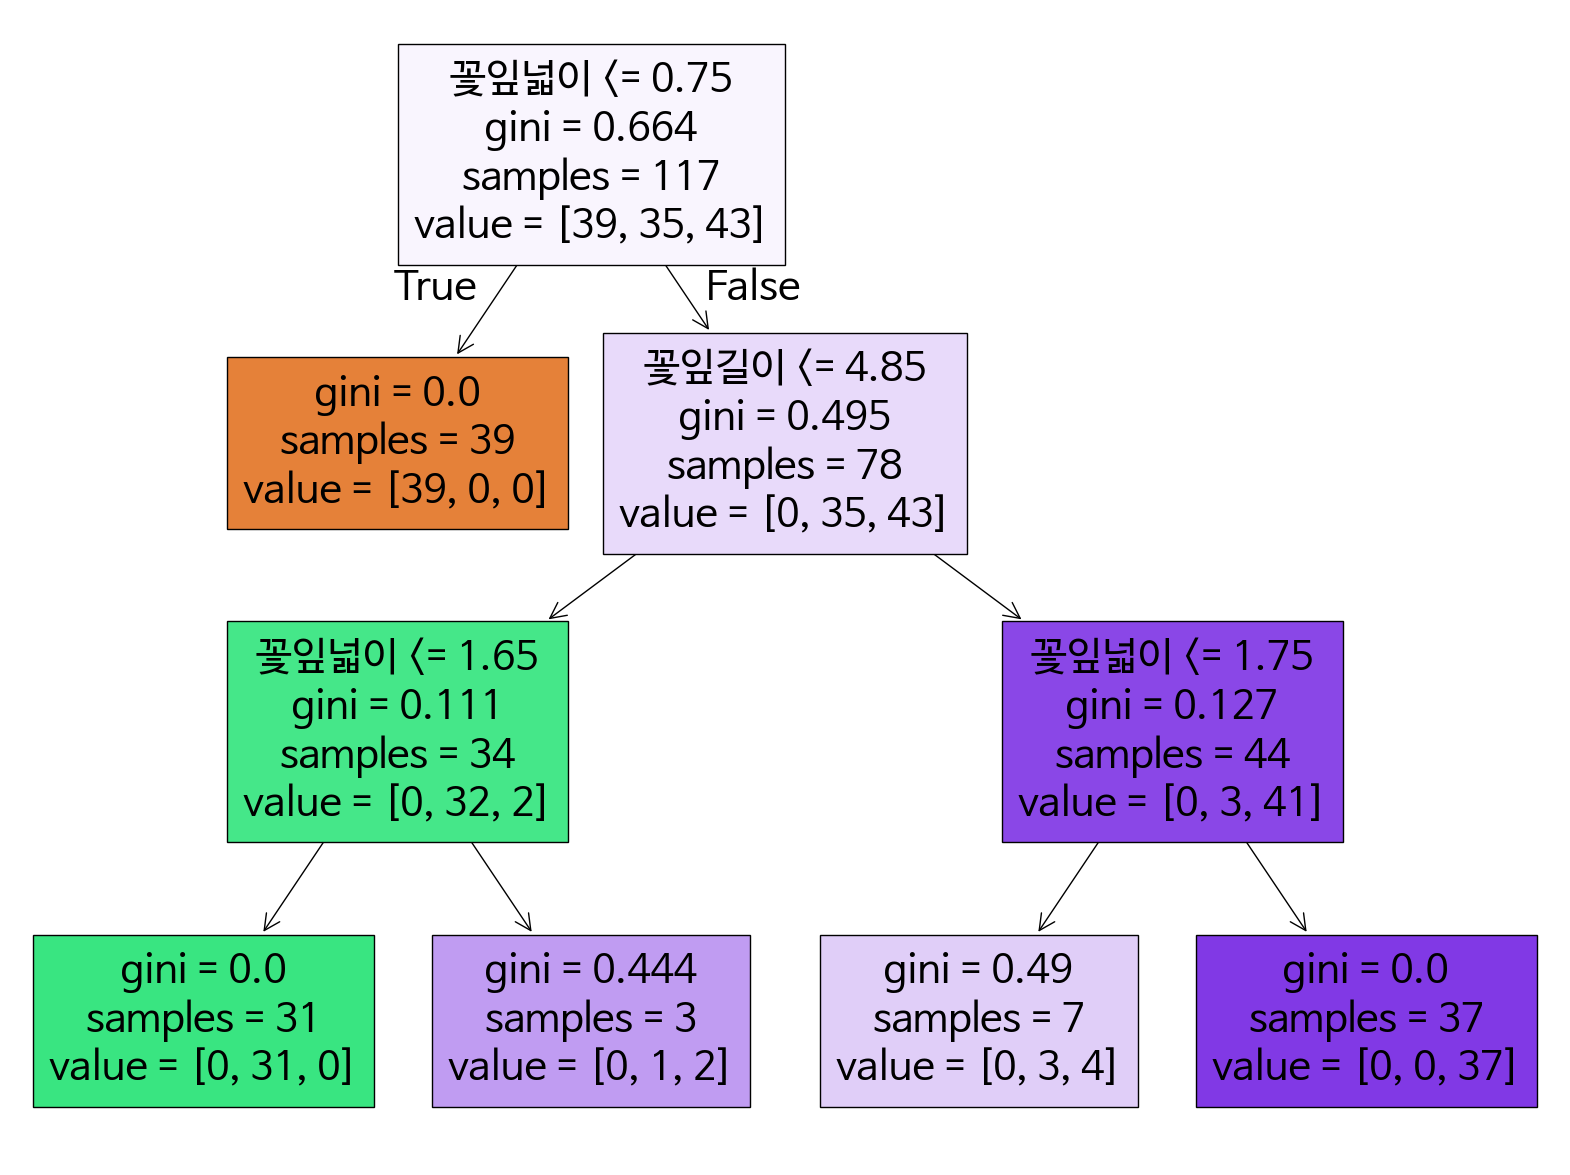

In [156]:
# Step 6. 판단 과정을 그림으로 확인
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

from sklearn.tree import plot_tree

plt.figure(figsize = (20, 15))
plot_tree(dt, filled=True, feature_names=['꽃받침길이', '꽃받침넓이', '꽃잎길이', '꽃잎넓이'])
plt.show()

## **의사결정나무 실습 - 생선 분류**

In [ ]:
# Step 1. 구글 코랩에 한글 폰트 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [171]:
# Step 2. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당
from google.colab import files

myfile = files.upload()

import io
import pandas as pd

# pd.read_csv로 csv 파일 불러오기

fish = pd.read_csv(io.BytesIO(myfile['fish.csv']), encoding='cp949')
fish

Saving fish.csv to fish.csv


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [172]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [173]:
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [175]:
# 무게, 길이, 높이, 넓이 정보를 가지고 생선의 종류 예측

data = fish[['Weight', 'Length', 'Height', 'Width']]
target = fish['Species']

# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=10)

# train, test 데이터 shape 확인

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(127, 4) (127,)
(32, 4) (32,)


In [181]:
# 의사결정나무 import
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
dt = DecisionTreeClassifier(max_depth = 13, random_state=10)

# 모델 학습
dt.fit(X_train, y_train)

# train, test 데이터에 대해 score 출력
print('▶ Train Data Scores: ', dt.score(X_train, y_train))
print('▶ Test Data Scores: ', dt.score(X_test, y_test))

▶ Train Data Scores:  1.0
▶ Test Data Scores:  0.65625


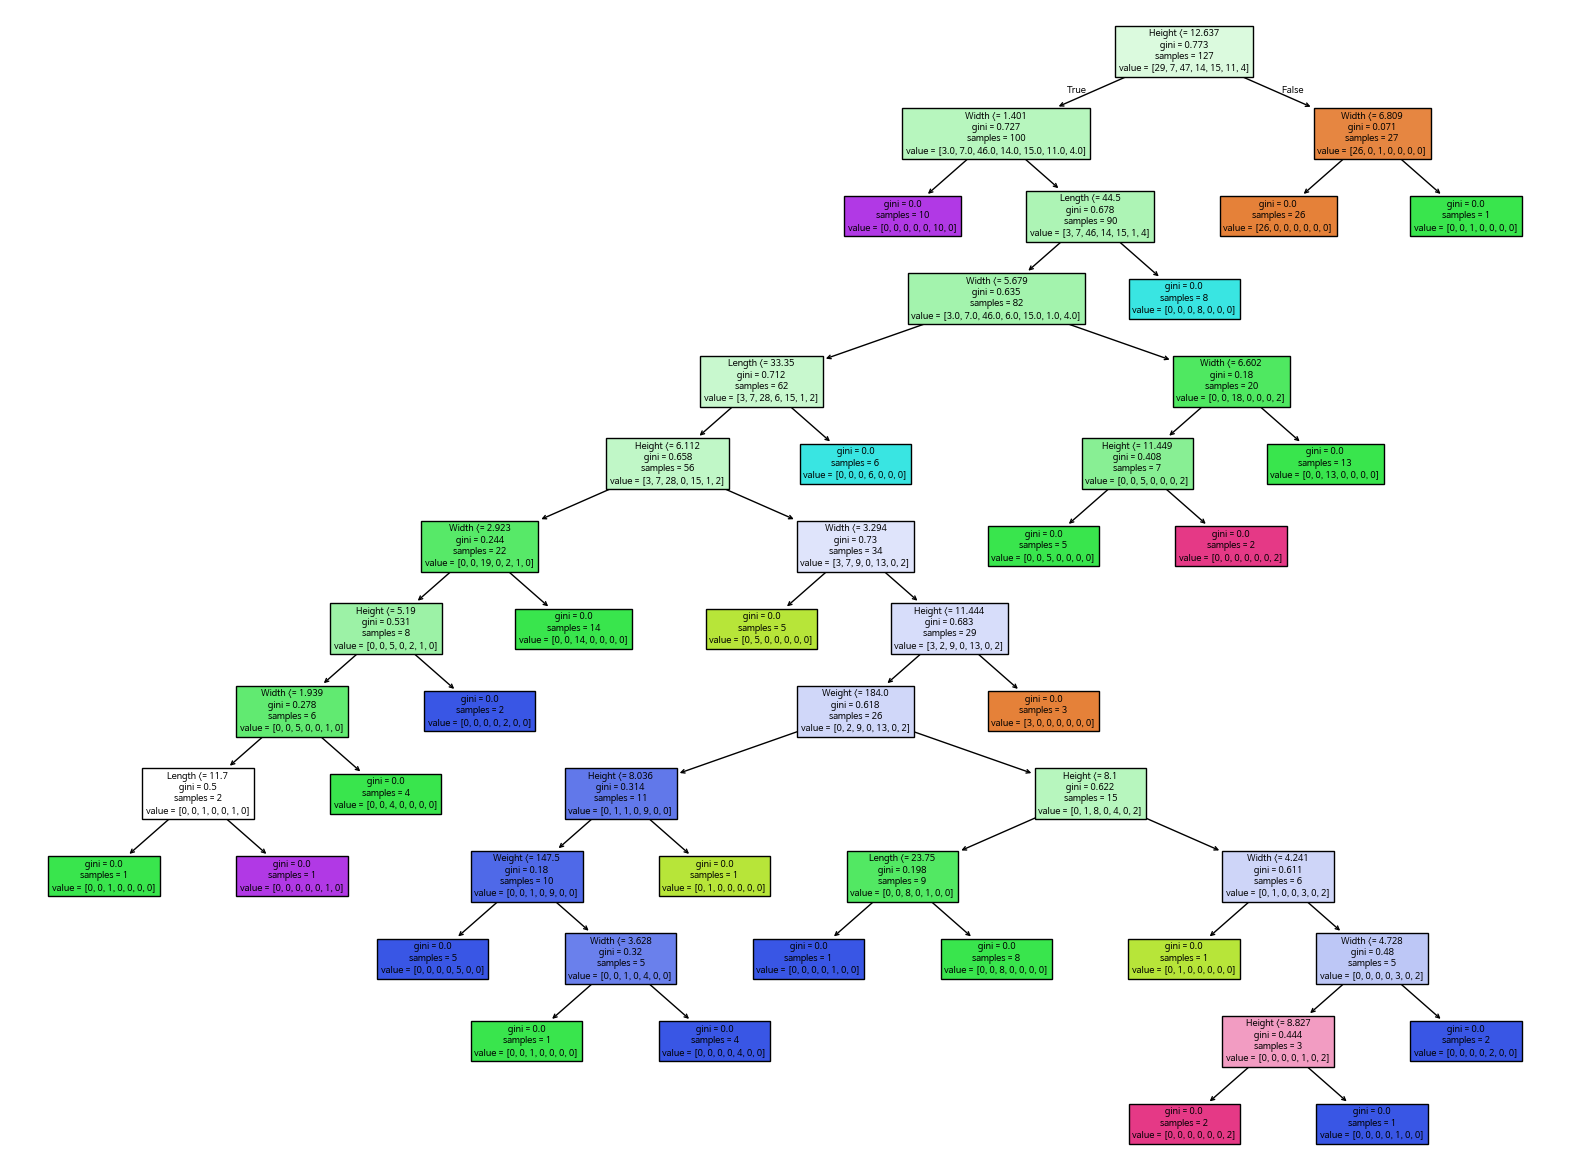

In [182]:
# 판단 과정 시각화
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['Weight', 'Length', 'Height', 'Width'])
plt.show()

## **제조 데이터 분류**

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
# Step 1. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당
from google.colab import files

data_dir = './'

x = pd.read_csv(data_dir + 'x.csv')
y = pd.read_csv(data_dir + 'y.csv')

# x, y에 대해 결측치를 0으로 채워주는 코드 작성
x = x.fillna(0)
y = y.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 의사결정트리 분류기

In [15]:
# 의사결정트리 라이브러리 import
from sklearn.tree import DecisionTreeClassifier

# 의사결정트리 분류 모델 객체 생성
model = DecisionTreeClassifier(max_depth = 5, random_state=10)

# 모델 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [16]:
from sklearn.metrics import accuracy_score

# 테스트 데이터에 대한 예측값을 구함
y_pred = model.predict(X_test)

# 정확도를 계산
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: ', accuracy)

Accuracy:  0.9171974522292994


### 로지스틱 분류기

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성 및 학습

lr = LogisticRegression()
lr.fit(X_train, y_train)

# 각 변수의 중요도 계산

importance = np.abs(lr.coef_[0])
feature_names = np.array(X_train.columns)

# 상위 20개 변수 추출
top_20_indices = np.argsort(importance)[-20:]

# 상위 20개의 변수명과, 중요도 저장
top_20_features = feature_names[top_20_indices]
top_20_importance = importance[top_20_indices]

print('상위 20개 변수: ', top_20_features)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


상위 20개 변수:  ['39' '64' '16' '33' '35' '54' '58' '17' '57' '62' '55' '6' '19' '65' '61'
 '67' '56' '59' '25' '26']


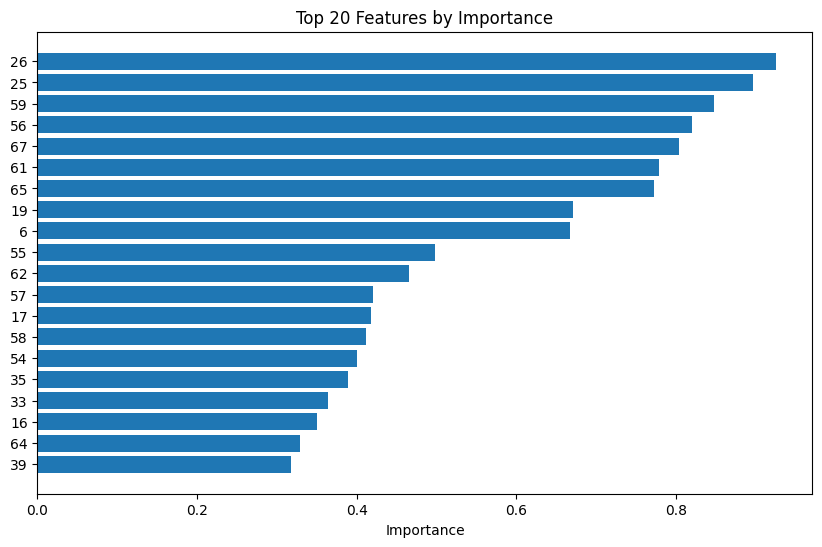

In [18]:
# 중요도에 따라 변수 시각화

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_20_features)), top_20_importance, align='center')
plt.yticks(range(len(top_20_features)), top_20_features)
plt.xlabel('Importance')
plt.title('Top 20 Features by Importance')
plt.show()

### 평가 지표 구하기

In [26]:
# 모델 평가 지표 구하기
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 테스트 데이터에 대한 예측값을 구함
y_pred = lr.predict(X_test)

# 정확도를 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

Accuracy:  0.9171974522292994
Precision:  0.0
Recall:  0.0
F1:  0.0


### Confusion Matrix

In [28]:
# LinearDiscriminatAnalysis 모델의 confusion matrix를 사용하기 위해 학습용 데이터의 예측값 저장

model_prediction_train = model.predict(X_train)
model_prediction_test = model.predict(X_test)

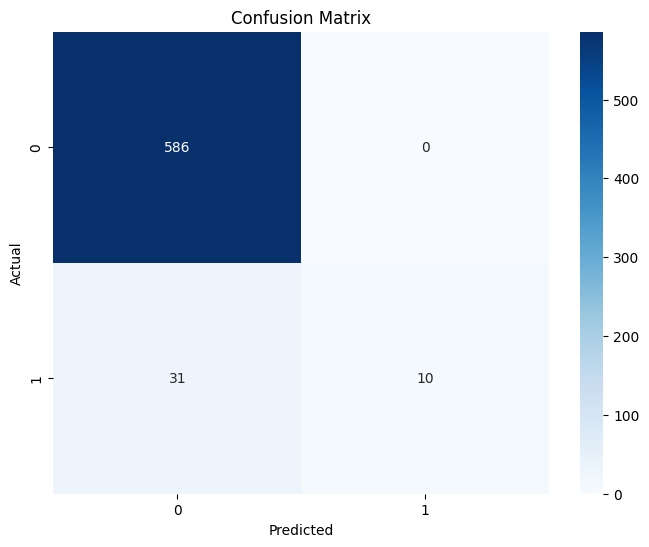

In [29]:
# confusion_matrix 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Heatmap 그리는 함수
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

plot_confusion_matrix(y_train, model_prediction_train)


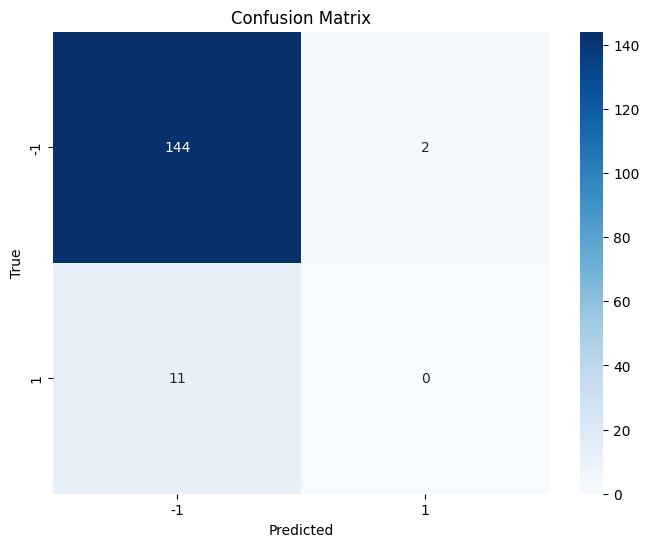

In [31]:
#LogisticRegression 모델에서 평가용 데이터('x_test, y_test')의 confusion matrix를 구하세요
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix 생성
cm = confusion_matrix(y_test, model_prediction_test)

# 클래스 레이블
class_labels = np.unique(y_test)

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## **그리드서치튜닝 실습 - 와인 분류**

In [2]:
# Step 1. 구글 코랩에 한글 폰트 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [203]:
# Step 2. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당
from google.colab import files

myfile = files.upload()

import io
import pandas as pd

# pd.read_csv를 통해 csv 파일 불러오기

wine = pd.read_csv(io.BytesIO(myfile['와인.csv']), encoding='cp949')
wine

Saving 와인.csv to 와인.csv


,알콜도수,당도,산도_ph,종류
0,9.4,1.9,3.51,레드와인
1,9.8,2.6,3.20,레드와인
2,9.8,2.3,3.26,레드와인
3,9.8,1.9,3.16,레드와인
4,9.4,1.9,3.51,레드와인
...,...,...,...,...
6492,11.2,1.6,3.27,화이트와인
6493,9.6,8.0,3.15,화이트와인
6494,9.4,1.2,2.99,화이트와인
6495,12.8,1.1,3.34,화이트와인


In [3]:
import pandas as pd

wine = pd.read_csv('./와인.csv', encoding='cp949')
wine

,알콜도수,당도,산도_ph,종류
0,9.4,1.9,3.51,레드와인
1,9.8,2.6,3.20,레드와인
2,9.8,2.3,3.26,레드와인
3,9.8,1.9,3.16,레드와인
4,9.4,1.9,3.51,레드와인
...,...,...,...,...
6492,11.2,1.6,3.27,화이트와인
6493,9.6,8.0,3.15,화이트와인
6494,9.4,1.2,2.99,화이트와인
6495,12.8,1.1,3.34,화이트와인


In [4]:
# 알콜도수, 당도, 산도_ph를 통해 종류 분류
data = wine[['알콜도수', '당도', '산도_ph']]
target = wine['종류']

# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=10)

In [5]:
# Step 3. GradientBoostingClassifier 모델 생성
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=50, max_depth=3, min_samples_split=2)

# 학습
gb.fit(X_train, y_train)

# score 출력
print('▶ Train Data Scores: ', gb.score(X_train, y_train))
print('▶ Test Data Scores: ', gb.score(X_test, y_test))

▶ Train Data Scores:  0.8835866846257456
▶ Test Data Scores:  0.87


In [12]:
# 그리드서치 활용하여 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 파라미터 설정
parms = {
    'max_depth': range(1, 10, 1),
    'min_samples_split': range(2, 20, 1),
}

# 그리드 서치 객체 생성
gs = GridSearchCV(GradientBoostingClassifier(random_state=50), parms, n_jobs=-1)

# 학습
gs.fit(X_train, y_train)

# 최적의 하이퍼파라미터 값 출력
print(gs.best_params_)

{'max_depth': 9, 'min_samples_split': 5}


In [13]:
# 정확도 출력
dt = gs.best_estimator_

print('▶ Train Data Score: ', dt.score(X_train, y_train))
print('▶ Test Data Score: ', dt.score(X_test, y_test))

▶ Train Data Score:  0.9959592072349432
▶ Test Data Score:  0.8853846153846154


## **그리드서치 실습 - 과일 분류**

In [33]:
# Step 2. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당
from google.colab import files

myfile = files.upload()

import io
import pandas as pd

# pd.read_csv를 통해 csv 파일 불러오기

fruits = pd.read_csv(io.BytesIO(myfile['의사결정나무_과일종류_2가지.csv']), encoding='cp949')
fruits

Saving 의사결정나무_과일종류_2가지.csv to 의사결정나무_과일종류_2가지.csv


,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,1900,19.0
5,수박,600,9.0
6,참외,500,8.0
7,참외,400,7.5
8,참외,450,5.0
9,참외,400,4.5


In [35]:
# Step 2. 주어진 데이터를 훈련용 데이터와 검증용 데이터로 분류
import numpy as np

# 무게, 길이로 종류를 예측
data = fruits[['무게', '길이']]
target = fruits['종류']

# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=10)

In [39]:
# GridSearch, DecisionTree import
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 찾고 싶은 파라미터 입력
parm = {
    'max_depth': range(1, 10, 1),
    'min_samples_split': range(2, 20, 1),
    'min_samples_leaf': range(1, 10, 1)
}

# 의사결정트리에 그리드 서치 적용
gs = GridSearchCV(DecisionTreeClassifier(random_state=10), parm, n_jobs=-1)

# 그리드서치 학습
gs.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 20)})

In [41]:
# 최고의 성능을 보인 파라미터 출력
print(gs.best_params_)

# dt에 최고 성능 모델 복사
dt = gs.best_estimator_

# 훈련용 data로 dt의 score 출력
print(dt.score(X_test, y_test))

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
1.0


In [43]:
# 한꺼번에 여러 속성값을 찾을 경우
print(dt.get_params())

# 찾고 싶은 파라미터 모두 정의
parm = {
    'max_depth': range(1, 10, 1),
    'min_samples_split': range(2, 20, 1),
    'min_samples_leaf': range(1, 10, 1)
}

# 의사결정트리에 그리드서치 적용
gs = GridSearchCV(DecisionTreeClassifier(random_state=10), parm, n_jobs=-1)

# 그리드서치 학습
gs.fit(X_train, y_train)

# 최고의 성능을 보인 파라미터 출력
print(gs.best_params_)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 10, 'splitter': 'best'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [48]:
# 그리드 서치 과정에서 진행한 교차검증 점수 중 최고값을 확인하기
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=10)

scores1 = cross_validate(dt, X_train, y_train, cv=5)
scores2 = cross_val_score(dt, X_train, y_train, cv=5)

print('▶ cross_validate 결과: ', np.mean(scores1['test_score']))
print('▶ cross_val_score 결과: ', np.mean(scores2))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


▶ cross_validate 결과:  0.8
▶ cross_val_score 결과:  0.8


In [52]:
# 최적의 모델로 테스트용 데이터로 최종 테스트하기
dt = gs.best_estimator_

# 훈련용, 테스트용 데이터로 수행한 score 출력
print('▶ Train Data Score: ', dt.score(X_train, y_train))
print('▶ Test Data Score: ', dt.score(X_test, y_test))

▶ Train Data Score:  0.8888888888888888
▶ Test Data Score:  1.0
